In [1]:
#%%
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
# %matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#%%

/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# spatial libraries
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import palplot
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import pysal as ps
from pysal.contrib.viz import mapping as maps
import mplleaflet

dataset locations

In [3]:
admin_root = '/media/alal/LAL_DATA/Data/Geodata/Nepal/Nepal_Admin_Boundaries/'
dist_shp = admin_root + 'Districts Level 3.shp'

In [4]:
nep_dhs_root = '/media/alal/LAL_DATA/Data/Surveys_Censuses_Misc/Nepal/NepalDemographicAndHealthSurveys/geo'
dhs_2001 = nep_dhs_root + '/NP_2001_DHS_01192018_187_70236/NPGE42FL.shp'
dhs_2006 = nep_dhs_root + '/NP_2006_DHS_01192018_186_70236/NPGE53FL.shp'
dhs_2011 = nep_dhs_root + '/NP_2011_DHS_01192018_186_70236/NPGE61FL.shp'
dhs_2016 = nep_dhs_root + '/NP_2016_DHS_01192018_186_70236/NPGE7AFL.shp'

trial plot

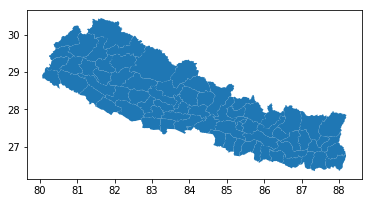

In [5]:
districts = gpd.read_file(dist_shp)
districts.plot()

In [22]:
dhs_points_2001 = gpd.read_file(dhs_2001)
dhs_points_2006 = gpd.read_file(dhs_2006)
dhs_points_2011 = gpd.read_file(dhs_2011)
dhs_points_2016 = gpd.read_file(dhs_2016)

In [24]:
dhs = [dhs_points_2001, dhs_points_2006, dhs_points_2011, dhs_points_2016]
colors = ['b','y','g','r']
for y in dhs:
    y.shape

# dhs_dict = dict(zip(dhs,colors))

(251, 21)

(260, 21)

(289, 21)

(383, 23)

Leaflet map of all waves

In [25]:
f, ax = plt.subplots(1)
dhs_points_2001.plot(color='b', ax = ax)
dhs_points_2006.plot(color='y', ax = ax)
dhs_points_2011.plot(color='g', ax = ax)
dhs_points_2016.plot(color='r', ax = ax)

mplleaflet.display(fig=f, crs=dhs_points_2016.crs)